In [1]:
import numpy as np
import pandas as pd

# Scikit speedrun, here we go

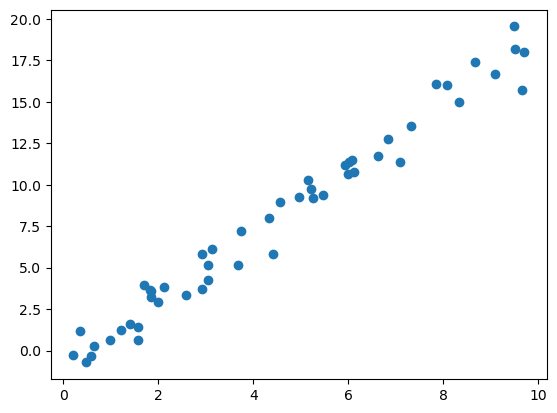

In [19]:
# testing some linear regression with scikit

# loading some random data from jake

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

In [20]:
# first we choose and import the model

from sklearn.linear_model import LinearRegression

In [21]:
# choosing a class of model is NOT the same as an instance of the model
# next we need to define the hyperparameters

model = LinearRegression(fit_intercept=True)
model

LinearRegression()

In [23]:
# similar to keras, we've loaded the model but we haven't done anything with it yet.

# next we need to "massage" the data a little, since scikit is expecting 2d feature data for X (y is already 1d right now which scikit is expecting)
X = x[:, np.newaxis]
X.ndim

2

In [24]:
# looks good, now it's time to fit the model

model.fit(X, y) # this turns out to be hilariously easy, though i'm prepared to eat this comment later

LinearRegression()

In [26]:
# model parameters are stored as functions too

print(model.coef_)  # represents the slope of the simple linear fit of the data
print(model.intercept_) # " intercept

[1.9776566]
-0.9033107255311146


In [27]:
## Predicting labels for unknown data

# so the model is fit, let's give it some data it hasn't seen yet and ask it to make some predictions

xfit = np.linspace(-1, 11)  # making some new data

Xfit = xfit[:, np.newaxis]

yfit = model.predict(Xfit)

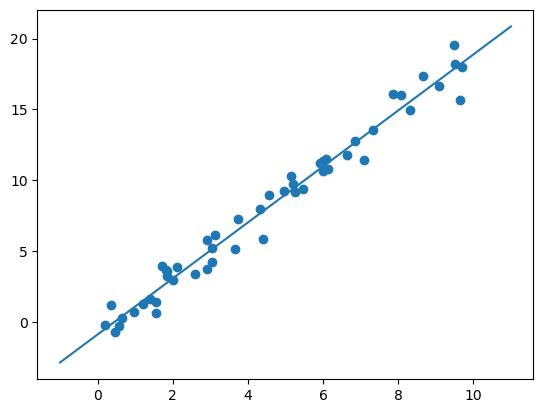

In [28]:
# finally, let's plot this

plt.scatter(x,y)
plt.plot(xfit, yfit)

In [41]:
## Supervised learning
## Iris classification

# loading iris petals datset
iris = sns.load_dataset('iris')
X_iris = iris.drop('species', axis=1)
y_iris = iris['species']


# can use sklearn's train_test_split to automatically separate data into a training and testing set
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state=1)

In [42]:
from sklearn.naive_bayes import GaussianNB      # 1. choose model class
model = GaussianNB()                            # 2. instantiate model
model.fit(Xtrain, ytrain)                       # 3. fit model to data
y_model = model.predict(Xtest)                  # 4. predict on new data

In [44]:
# now we can apply an accuracy score, fun.

from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

In [49]:
## Hand-written digits

from sklearn.datasets import load_digits
digits = load_digits()

digits.images.shape     # 1797 samples, each of which are 8x8 pixels

(1797, 8, 8)

In [53]:
# prepping data

X = digits.data
X.shape

(1797, 64)

In [51]:
y = digits.target
y.shape

(1797,)

In [54]:
# notice that the X data has a 64-feature set
# lets reduce the dimentionality of this data using an unsupervised method

from sklearn.manifold import Isomap

iso = Isomap(n_components=2)

iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

/Users/mark/anaconda3/envs/ds/lib/python3.11/site-packages/sklearn/manifold/_isomap.py:359: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Users/mark/anaconda3/envs/ds/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)

/var/folders/5x/1n063tsx6jx9wzcy34jzlqzh0000gn/T/ipykernel_22831/795355848.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('nipy_spectral', 10))


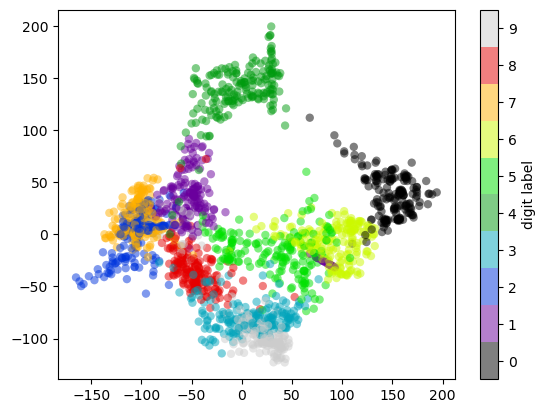

In [55]:
# let's plot this data

plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);


In [56]:
# let's split the data up

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [58]:
# now let's use a Gaussian naive Bayes model

from sklearn.naive_bayes import GaussianNB  # 1. choose model
model = GaussianNB()                        # 2. 
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [59]:
# accuracy score
# not bad, not bad
# but actually yeah this is bad

from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

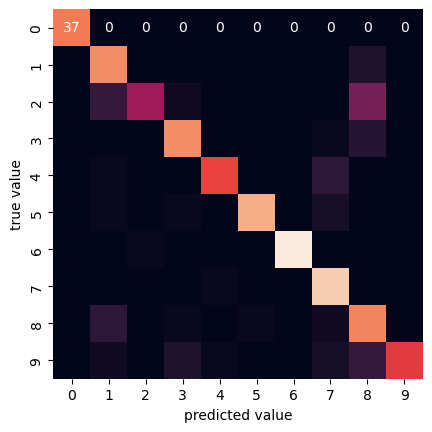

In [60]:
# using a confusion matrix here to get an idea of what went wrong

from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

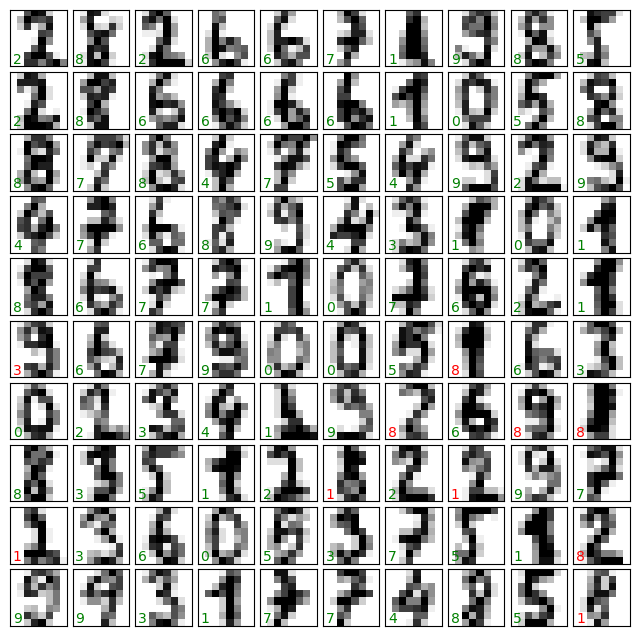

In [61]:
# we can also directly examine some results here

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')